In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from colorama import Fore, Style

 Dane do przeprowadzenia analizy zostały pobrane ze strony **https://www.kaggle.com/datasets**.
 ---


- Przedstawiają szacunkowy wolumen handlu tranzytowego (w tonach metrycznych) w portach na świecie w latach 2019-2024. Zbiór danych jest obszerny i obejmuje przeładunki różnych typów statków, takich jak kontenerowce, statki RoRo, tankowce oraz masowce.

- W swojej analizie chciałabym skupić się na przeładunkach kontenerów. Celem analizy jest identyfikacja krajów z największym wolumenem importu i eksportu w określonym przedziale czasowym. Planuję porównać 10 czołowych państw pod względem przeładunków kontenerów. Dodatkowo przyjrzę sie jak przekłada się liczba dostępnych terminali kontenerowych do wielkość przeładowanego ładunku.



In [84]:
Data = pd.read_csv('Daily_Port_Activity_Data_and_Trade_Estimates.csv')

# 1. Poniższe zestawienie przedstawia dane wejściowe
---

In [85]:
# Podstawowa eksploracja danych

display(Data.head())

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/01/01 00:00:00+00,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019/01/02 00:00:00+00,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019/01/03 00:00:00+00,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019/01/04 00:00:00+00,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019/01/05 00:00:00+00,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


In [86]:
print("Wymiar danych")
Data.shape


Wymiar danych


(3486153, 30)

Zbiór danych jest obszerny i obejmuje ponad trzy miliony wierszy i trzydzieści kolumn


 Kolumny przedstawiają  wielkość przeładunkow na statkach z podziałem na kraje, porty w latach 2019-2024
---

In [87]:
print("Nazwy kolumn")
Data.columns


Nazwy kolumn


Index(['date', 'year', 'month', 'day', 'portid', 'portname', 'country', 'ISO3',
       'portcalls_container', 'portcalls_dry_bulk', 'portcalls_general_cargo',
       'portcalls_roro', 'portcalls_tanker', 'portcalls_cargo', 'portcalls',
       'import_container', 'import_dry_bulk', 'import_general_cargo',
       'import_roro', 'import_tanker', 'import_cargo', 'import',
       'export_container', 'export_dry_bulk', 'export_general_cargo',
       'export_roro', 'export_tanker', 'export_cargo', 'export', 'ObjectId'],
      dtype='object')

 Podstawowe miary statystyczne
---

In [88]:
Data.describe()

,year,month,day,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,portcalls_roro,portcalls_tanker,portcalls_cargo,portcalls,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
count,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,...,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06,3.486153e+06
mean,2.021424e+03,6.372355e+00,1.570616e+01,7.544677e-01,4.103604e-01,6.160220e-01,9.460715e-02,7.990662e-01,1.875457e+00,2.674523e+00,...,6.234217e+03,8.719786e+03,1.858505e+03,3.971822e+03,4.837042e+02,7.414476e+01,2.333436e+03,6.388176e+03,8.721612e+03,1.743077e+06
std,1.676392e+00,3.390236e+00,8.789055e+00,2.726176e+00,1.120909e+00,1.514264e+00,4.545691e-01,2.649262e+00,4.336163e+00,6.205372e+00,...,2.333539e+04,3.080714e+04,1.086288e+04,2.975670e+04,1.993727e+03,6.773327e+02,1.437269e+04,3.247798e+04,3.683176e+04,1.006366e+06
min,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.020000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.715390e+05
50%,2.021000e+03,6.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.743077e+06
75%,2.023000e+03,9.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,...,1.544068e+03,3.381243e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.181209e+03,2.765387e+03,2.614615e+06
max,2.024000e+03,1.200000e+01,3.100000e+01,8.900000e+01,4.600000e+01,7.200000e+01,1.700000e+01,2.800000e+02,1.380000e+02,4.020000e+02,...,8.310720e+05,1.330959e+06,4.588537e+05,1.732930e+06,1.443295e+05,3.996245e+04,1.211276e+06,1.732930e+06,1.732930e+06,3.486153e+06


Do analizy przeładunków na statkach kontenerowych wybrano następujące zmienne: 
- lata - `year`
- miesiące - `month`
- porty - `portname`
- kraje - `country`
- wielkość importu - `import_container`
- wielkość eksportu - `export_container`
- kolumnę definiującą statki kontenerowe - `portcalls_container`
  we - etc

Sprawdzam czy występują wartości brakujące


In [89]:
Data.isnull().sum()

date                       0
year                       0
month                      0
day                        0
portid                     0
portname                   0
country                    0
ISO3                       0
portcalls_container        0
portcalls_dry_bulk         0
portcalls_general_cargo    0
portcalls_roro             0
portcalls_tanker           0
portcalls_cargo            0
portcalls                  0
import_container           0
import_dry_bulk            0
import_general_cargo       0
import_roro                0
import_tanker              0
import_cargo               0
import                     0
export_container           0
export_dry_bulk            0
export_general_cargo       0
export_roro                0
export_tanker              0
export_cargo               0
export                     0
ObjectId                   0
dtype: int64

Sprawdzam, jakiego typu dane znajdują się w każdej z kolumn, co pomoże mi lepiej zrozumieć strukturę zbioru danych.


In [90]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486153 entries, 0 to 3486152
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   year                     int64  
 2   month                    int64  
 3   day                      int64  
 4   portid                   object 
 5   portname                 object 
 6   country                  object 
 7   ISO3                     object 
 8   portcalls_container      int64  
 9   portcalls_dry_bulk       int64  
 10  portcalls_general_cargo  int64  
 11  portcalls_roro           int64  
 12  portcalls_tanker         int64  
 13  portcalls_cargo          int64  
 14  portcalls                int64  
 15  import_container         float64
 16  import_dry_bulk          float64
 17  import_general_cargo     float64
 18  import_roro              float64
 19  import_tanker            float64
 20  import_cargo             float64
 21  import  

In [92]:
countries = Dane['country'].unique()
ports = Dane['portname'].unique()

W zbiorze danych mamy 180 krajów oraz 1620 portów.
---

In [93]:
print('Ilość Państw')
print(countries.shape)
print('Ilość portów')
print(porty.shape)

Ilość Państw
(180,)
Ilość portów
(1620,)


# 2. Przeładunki w latach 2019-2024 na statkach kontenerowych.
---

In [94]:
container_terminal = Data[['year', 'month','country', 'portcalls_container', 'portname', 'import_container', 'export_container']]

In [95]:
container_terminal

,year,month,country,portcalls_container,portname,import_container,export_container
0,2019,1,Australia,0,Abbot Point,0.000000,0.000000
1,2019,1,Australia,0,Abbot Point,0.000000,0.000000
2,2019,1,Australia,0,Abbot Point,0.000000,0.000000
3,2019,1,Australia,0,Abbot Point,0.000000,0.000000
4,2019,1,Australia,0,Abbot Point,0.000000,0.000000
...,...,...,...,...,...,...,...
3486148,2024,9,Portugal,1,Leixoes,961.410574,0.000000
3486149,2024,9,Portugal,1,Leixoes,211.382114,0.000000
3486150,2024,9,Portugal,2,Leixoes,1339.750289,2619.870385
3486151,2024,9,Portugal,3,Leixoes,725.625104,1231.783181


# 3. Podsumowanie importu względem lat dla każdego kraju.
# Jednostką miary importu są tony metryczne
---

In [128]:
container_terminal_pivot_import = container_terminal.pivot_table(index='year', columns='country', values='import_container', aggfunc='sum')
print('Import towarów w kontenerach w latach 2019-2024')
container_terminal_pivot_import

Import towarów w kontenerach w latach 2019-2024


country,Albania,Algeria,American Samoa,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
year,,,,,,,,,,,,,,,,,,,,,
2019,49111.228,2724818.402,73633.215,3117344.047,0.000,71877.441,855286.701,176774.120,10596974.309,0.000,...,688696.111,30367837.469,31436687.857,81331226.477,483723.065,762643.857,98243.423,816608.732,32810917.529,2366080.971
2020,88722.162,2249211.001,98458.608,2672926.131,0.000,75777.194,785464.868,196255.618,11662949.767,0.000,...,816214.112,32588434.597,30172812.859,88224115.437,415062.998,895187.507,68855.349,1055065.763,33319059.649,2350611.627
2021,74540.951,2099335.714,70547.204,2358073.708,0.000,64557.487,974692.550,185013.514,11299379.585,0.000,...,953337.874,30875229.763,31148020.887,106149775.099,348936.717,928052.373,73470.983,974219.638,29837496.644,1923427.841
2022,207497.693,2254827.352,53200.325,2716175.120,0.000,79176.990,962301.209,225696.585,11932421.115,0.000,...,128030.667,32349014.189,26680263.240,104070598.176,302750.674,973153.884,65654.926,1046164.946,29444447.847,1520037.479
2023,181975.751,3210085.766,61042.057,2360956.839,0.000,83755.324,892335.986,226844.333,11238483.529,0.000,...,20871.230,35421963.702,26327598.551,93866726.409,322855.248,1029736.685,102291.319,1168805.068,31076964.748,1315788.274
2024,145467.042,2887161.038,85787.762,1788882.773,0.000,63057.269,449749.187,197691.904,8654805.467,0.000,...,12266.487,27527051.411,20294484.112,80793287.645,245322.912,937429.758,78102.768,1594219.201,24363860.705,864891.905



# 4. Kraje o największym udziale w globalnym imporcie pod względem masy (w tonach metrycznych) w latach 2019-2024.
---

In [98]:
sum_import_container = container_terminal_pivot_import.sum(axis=0)

In [99]:
sum_import_container_df = sum_import_container.reset_index()

In [100]:
sum_import_container_df.columns = ['country', 'import_container']# nazwanie kolumn

In [101]:
sum_import_container_df.set_index('country', inplace=True)# country bedzie indexem

In [102]:
sum_import_container_df = sum_import_container_df.sort_values(by='import_container', ascending=False)#posortowanie po wartości import containers

In [108]:
countries_with_highest_imports = sum_import_container_df.head(10)

In [109]:
countries_with_highest_imports = sum_import_container_df.head(10)
print(' 10 krajów z najwyższym importem w latach 2019-2024 (jednostka miary tony)')
countries_with_highest_imports

 10 krajów z najwyższym importem w latach 2019-2024 (jednostka miary tony)


,import_container
country,
China,7.321144e+08
United States,5.544357e+08
Singapore,2.771709e+08
Korea,2.115748e+08
Malaysia,2.040678e+08
Japan,2.039061e+08
United Arab Emirates,1.891295e+08
Vietnam,1.808527e+08
The Netherlands,1.739821e+08


In [110]:
countries_with_highest_imports = countries_with_highest_imports.reset_index()

In [112]:
countries_with_highest_imports

,country,import_container
0,China,7.321144e+08
1,United States,5.544357e+08
2,Singapore,2.771709e+08
3,Korea,2.115748e+08
4,Malaysia,2.040678e+08
5,Japan,2.039061e+08
6,United Arab Emirates,1.891295e+08
7,Vietnam,1.808527e+08
8,The Netherlands,1.739821e+08
9,Spain,1.666415e+08


In [113]:
countries_with_highest_imports.to_excel('Kraje_z_najwyższym_importem.xlsx', index=False)

In [116]:
countries_import = countries_with_highest_imports.index.tolist()

In [117]:
import_values = countries_with_highest_imports["import_container"].tolist()  # Lista wartości

In [119]:
df_dict = countries_with_highest_imports["import_container"].to_dict()

Udział procentowy 10 krajów o najwyższym udziale globalnym importu za pomocą Pie Chart.
---

In [120]:

label = list(df_dict.keys()) 
sizes = list(df_dict.values())

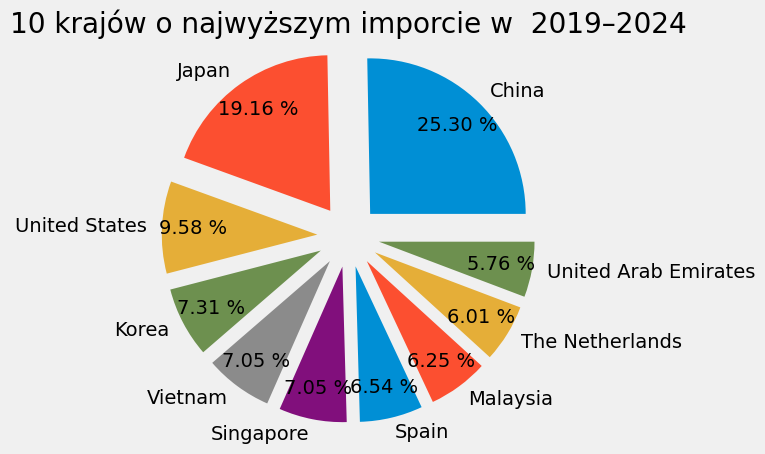

In [121]:

plt.title('10 krajów o najwyższym imporcie w  2019–2024')
label = ['China', 'Japan', 'United States', 'Korea', 'Vietnam', 'Singapore', 'Spain', 'Malaysia', 'The Netherlands', 'United Arab Emirates']
explode = [0.2] * len(label) 
plt.pie(sizes, explode=explode, labels=label, pctdistance=0.8, autopct='%.2f %%')
plt.show()

In [122]:
container_terminal_pivot_import_10=container_terminal_pivot_import[['China', 'Japan', 'United States', 'Korea', 'Vietnam', 'Singapore', 'Spain', 'Malaysia', 'The Netherlands', 'United Arab Emirates']]

# 5. Analiza struktury importu wśród 10 największych krajów importujących w podziale na lata 2019-2024
---

In [125]:
print('10 krajów z najwyższym importem w latach 2019-2024')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
container_terminal_pivot_import_10

10 krajów z najwyższym importem w latach 2019-2024


country,China,Japan,United States,Korea,Vietnam,Singapore,Spain,Malaysia,The Netherlands,United Arab Emirates
year,,,,,,,,,,
2019,149343407.719,39521140.724,81331226.477,36356473.081,32810917.529,55029488.551,30486477.903,37867072.572,32727238.640,30367837.469
2020,150841159.280,36062074.433,88224115.437,36284558.483,33319059.649,52394887.202,29538516.232,32301379.525,33052798.417,32588434.597
2021,117995979.175,34832493.787,106149775.099,33512785.740,29837496.644,44173682.331,27484111.592,29479955.940,30082494.507,30875229.763
2022,106374715.694,35061336.035,104070598.176,36942388.588,29444447.847,42320482.426,25601227.514,33037622.604,28481235.405,32349014.189
2023,117746994.146,32824763.011,93866726.409,39058569.388,31076964.748,48355843.576,28749783.176,40410540.937,28993025.764,35421963.702
2024,89812174.004,25604328.297,80793287.645,29420067.977,24363860.705,34896553.304,24781339.879,30971237.055,20645316.697,27527051.411


10 krajów z najwyższym importem w latach 2019-2024


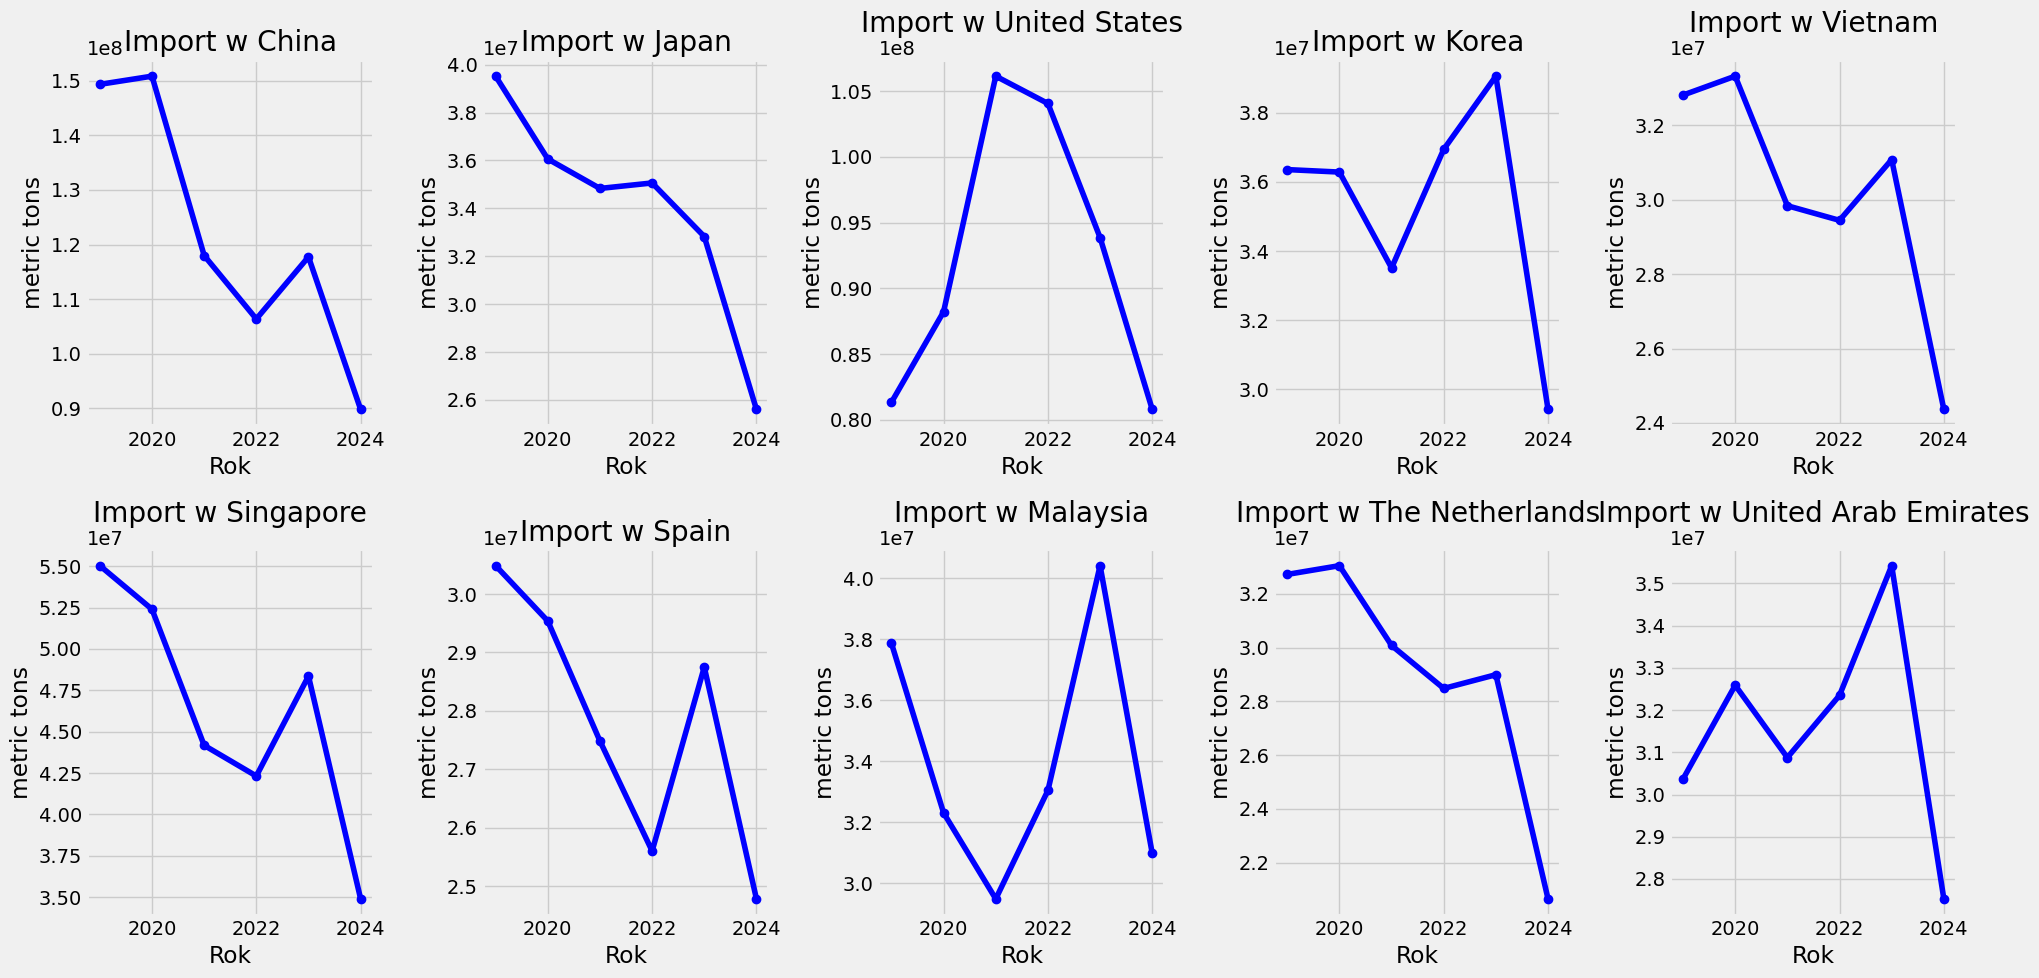

In [202]:
print('10 krajów z najwyższym importem w latach 2019-2024')
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flatten()):
    if i < len(container_terminal_pivot_import_10.columns): 
        column_name = container_terminal_pivot_import_10.columns[i]
        ax.plot(container_terminal_pivot_import_10.index, 
                container_terminal_pivot_import_10[column_name],  
                marker='o', color='blue')  
        ax.set_title(f'Import w {column_name}') 
        ax.set_xlabel('Rok')  
        ax.set_ylabel('metric tons') 

plt.tight_layout()  
plt.show()

Dziesięć czołowych krajów pod względem importu w latach 2019-2024.
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


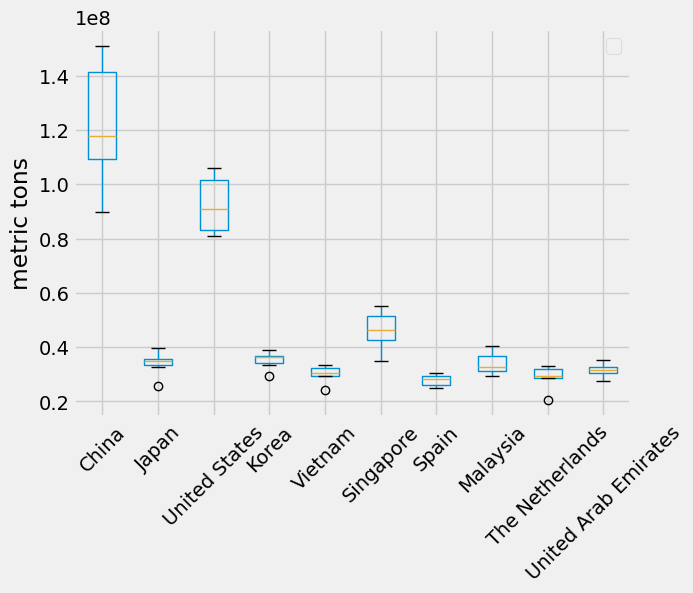

In [209]:
container_terminal_pivot_import_10.iloc[:, :].boxplot()
plt.xticks(rotation=45)
plt.ylabel('metric tons')
plt.legend()

Analiza rozkładu  importu z wyłączeniem Chin.
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


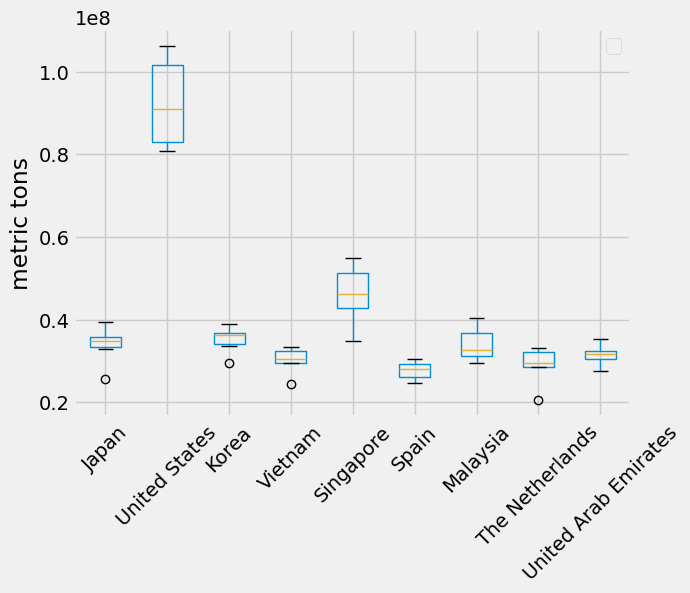

In [208]:
container_terminal_pivot_import_10.iloc[:, 1:].boxplot()
plt.xticks(rotation=45)
plt.ylabel('metric tons')
plt.legend()

Zestawienie kluczowych parametrów statystycznych.
---

In [136]:
container_terminal_pivot_import_10.describe()

country,China,Japan,United States,Korea,Vietnam,Singapore,Spain,Malaysia,The Netherlands,United Arab Emirates
count,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
mean,122019071.669,33984356.048,92405954.874,35262473.876,30142124.520,46195156.232,27773576.049,34011301.439,28997018.238,31521588.522
std,24057423.492,4656643.488,10973438.673,3366572.769,3226675.775,7319952.778,2244290.347,4229993.005,4506864.150,2635942.647
min,89812174.004,25604328.297,80793287.645,29420067.977,24363860.705,34896553.304,24781339.879,29479955.940,20645316.697,27527051.411
25%,109217785.307,33326695.705,83054448.717,34205728.926,29542710.046,42783782.402,26071948.534,31303772.673,28609182.995,30494685.542
50%,117871486.661,34946914.911,91045420.923,36320515.782,30457230.696,46264762.953,28116947.384,32669501.064,29537760.135,31612121.976
75%,141506550.583,35811889.834,101519630.234,36795909.711,32377429.333,51385126.296,29341332.968,36659710.080,32066052.606,32528579.495
max,150841159.280,39521140.724,106149775.099,39058569.388,33319059.649,55029488.551,30486477.903,40410540.937,33052798.417,35421963.702


# 6. Podsumowanie eksportu w latach 2019-2024 dla każdego kraju.
Jednostką miary eksportu są tony metryczne.
---

In [192]:
container_terminal_pivot_export = container_terminal.pivot_table(index='year', columns='country', values='export_container', aggfunc='sum')

In [211]:
print('Eksport towarów w kontenerach w latech 2019-2024')
container_terminal_pivot_export

Eksport towarów w kontenerach w latech 2019-2024


country,Albania,Algeria,American Samoa,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
year,,,,,,,,,,,,,,,,,,,,,
2019,13193.781,189005.491,32894.271,212707.303,119.518,25429.130,2121970.876,73126.765,7011149.465,0.000,...,2411445.481,18358686.375,12707157.281,48313027.183,177735.096,1289219.150,19090.058,44983.807,18853131.704,41345.041
2020,15118.920,136863.184,30191.076,284942.576,0.000,13018.458,1846585.399,50046.736,6136484.381,0.000,...,2740952.123,24027726.029,9864572.524,45460909.363,161211.184,1334224.418,19549.663,269681.719,21774985.773,13674.359
2021,18106.211,137021.109,31247.326,241628.505,0.000,17946.312,1518945.693,17373.063,5534659.298,0.000,...,2123286.579,23755936.248,6826547.928,36018025.407,174567.965,1263050.507,13802.106,282069.554,21210622.882,12232.699
2022,18435.580,156369.175,18995.068,188279.173,0.000,11571.618,1292128.030,10387.992,5591534.921,0.000,...,339415.141,22409716.698,7066518.655,29894066.357,173938.681,1607898.053,20325.832,205463.221,22931006.830,13484.604
2023,15928.413,113657.711,28441.954,393288.868,0.000,14312.065,1338985.897,19758.901,6377856.992,0.000,...,189094.336,24946269.208,7574082.200,35051348.758,165012.466,1862325.733,28237.275,90020.074,26680822.217,60983.903
2024,11828.087,117346.436,23092.099,362827.857,0.000,18736.718,1368234.181,17316.458,4786507.078,0.000,...,127997.648,20003986.025,4596454.475,27483557.710,130338.589,2065325.382,20597.929,86035.399,18179976.023,17130.281


In [177]:
sum_export_container = container_terminal_pivot_export.sum(axis=0)
sum_export_container_df = sum_export_container.reset_index()# nadanie nowego indexu
sum_export_container_df.columns = ['country', 'export_container']# nazwanie kolumn

In [178]:
sum_export_container_df.set_index('country', inplace=True)# country bedzie indexem

In [179]:
sum_export_container_df = sum_export_container_df.sort_values(by='export_container', ascending=False)#posortowanie po wartości import containers

In [180]:
container_terminal_pivot_export=sum_export_container_df.head(10)

# 7. Kraje o największym udziale w globalnym eksporcie pod względem masy (w tonach metrycznych) w latach 2019-2024..
---

In [181]:
container_terminal_pivot_export

,export_container
country,
China,1889577071.508
Singapore,343431367.896
Korea,226771451.882
United States,222220934.778
Hong Kong SAR,210610005.674
Malaysia,208269854.762
Spain,204677745.161
Brazil,199380631.040
The Netherlands,168338400.082


In [185]:
container_terminal_pivot_export_reset = container_terminal_pivot_export.reset_index()

In [186]:
container_terminal_pivot_export_reset

,country,export_container
0,China,1889577071.508
1,Singapore,343431367.896
2,Korea,226771451.882
3,United States,222220934.778
4,Hong Kong SAR,210610005.674
5,Malaysia,208269854.762
6,Spain,204677745.161
7,Brazil,199380631.040
8,The Netherlands,168338400.082
9,Belgium,161406763.883


In [166]:
container_terminal_pivot_export_reset.to_excel('Kraje_z_najwyższym_exportem.xlsx', index=False)

In [189]:
df_dict_exp = container_terminal_pivot_export["export_container"].to_dict()
labels_exp = list(df_dict_exp.keys())
sizes_exp = list(df_dict_exp.values())

Udział procentowy 10 krajów o najwyższym udziale globalnym eksportu za pomocą Pie Chart.
---

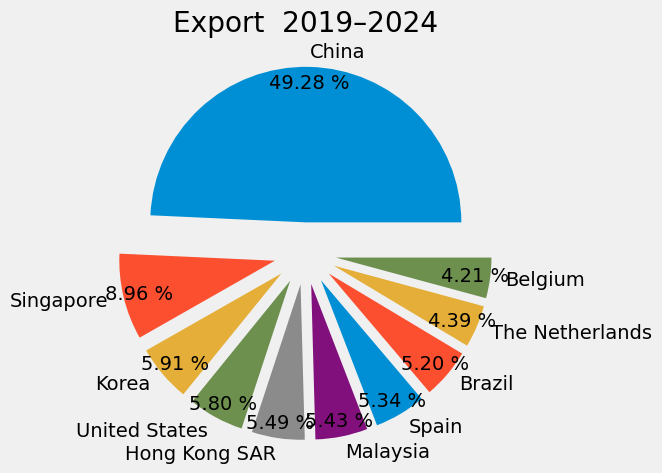

In [188]:
plt.title('Export  2019–2024', pad=20)

label = ['China', 'United States', 'Korea', 'Hong Kong SAR', 'Singapore', 'Spain', 'Malaysia', 'The Netherlands', 'Belgium', 'Brazil']
explode = [0.2] * len(label) 
plt.pie(sizes_exp, explode=explode, labels=labels_exp, pctdistance=0.9, autopct='%.2f %%')
plt.show()

In [194]:
container_terminal_pivot_export_10 = container_terminal_pivot_export[['China', 'United States', 'Korea', 'Singapore', 'Belgium', 'Spain', 'Malaysia', 'Hong Kong SAR', 'Brazil',  'The Netherlands']]

# 8. Analiza rozkładu eksportu  z podziałem na lata.
---

In [195]:
print('10 krajów z najwyższym exportem w latach 2019-2024')
container_terminal_pivot_export_10

10 krajów z najwyższym exportem w latach 2019-2024


country,China,United States,Korea,Singapore,Belgium,Spain,Malaysia,Hong Kong SAR,Brazil,The Netherlands
year,,,,,,,,,,
2019,329298981.177,48313027.183,42726621.894,66041952.525,31058230.568,37813832.368,39995090.512,40605151.400,34674700.666,34603765.598
2020,311015294.226,45460909.363,38241006.915,63630183.150,31172240.838,37156584.381,33791451.006,34354378.736,36273772.148,36115736.262
2021,308096789.317,36018025.407,35716883.764,54153766.390,30000962.088,37680301.946,30023121.844,35154098.803,34879203.246,29903320.315
2022,326022233.215,29894066.357,38068006.151,54310586.202,25772374.145,33158340.113,34994050.304,37178246.683,32578911.748,25094149.298
2023,351522338.180,35051348.758,42143421.997,60870073.546,25372837.067,32565967.389,40141137.192,36048555.899,34389452.935,25351733.510
2024,263621435.392,27483557.710,29875511.160,44424806.083,18030119.176,26302718.963,29325003.904,27269574.153,26584590.297,17269695.099


10 krajów z najwyższym eksportem w latach 2019-2024.
---

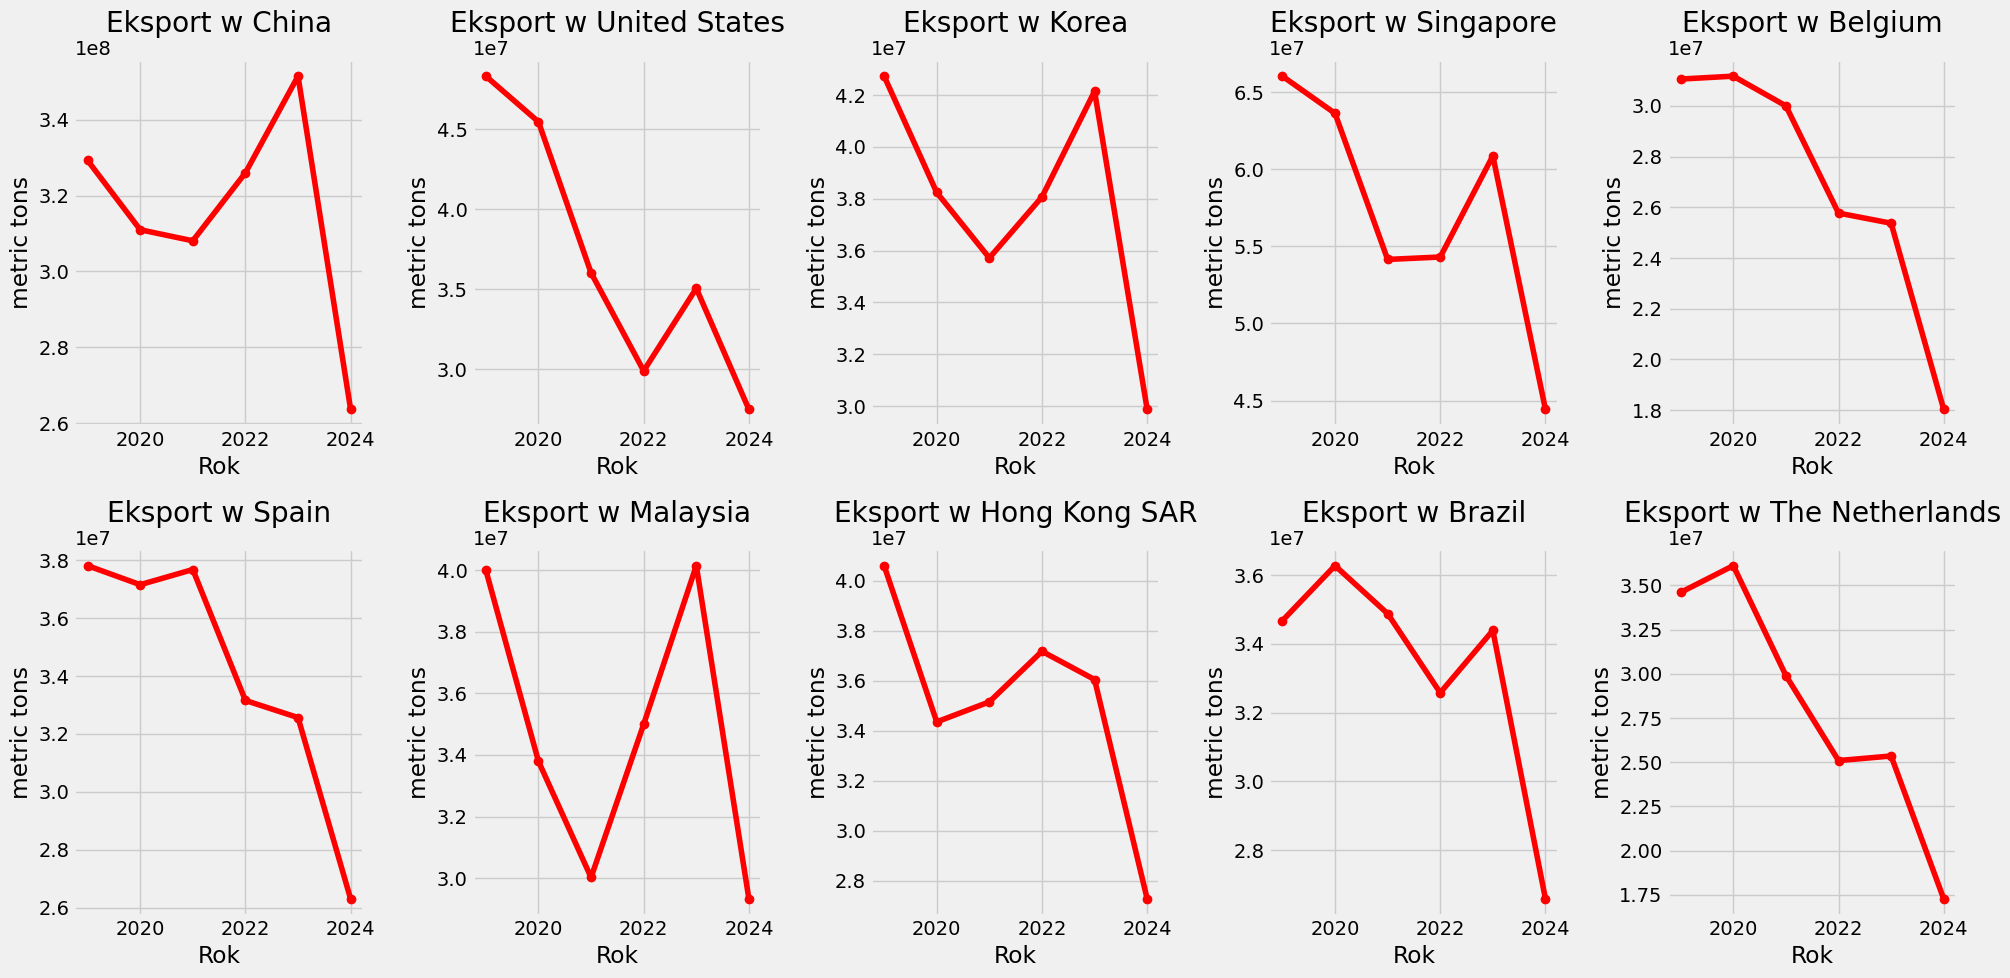

In [210]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flatten()):
    if i < len(container_terminal_pivot_export_10.columns): 
        column_name = container_terminal_pivot_export_10.columns[i]
        ax.plot(container_terminal_pivot_export_10.index, 
                container_terminal_pivot_export_10[column_name],  
                marker='o', color='red')  
        ax.set_title(f'Eksport w {column_name}') 
        ax.set_xlabel('Rok')  
        ax.set_ylabel('metric tons') 

plt.tight_layout()  
plt.show()

Analiza rozkładu eksportu.
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


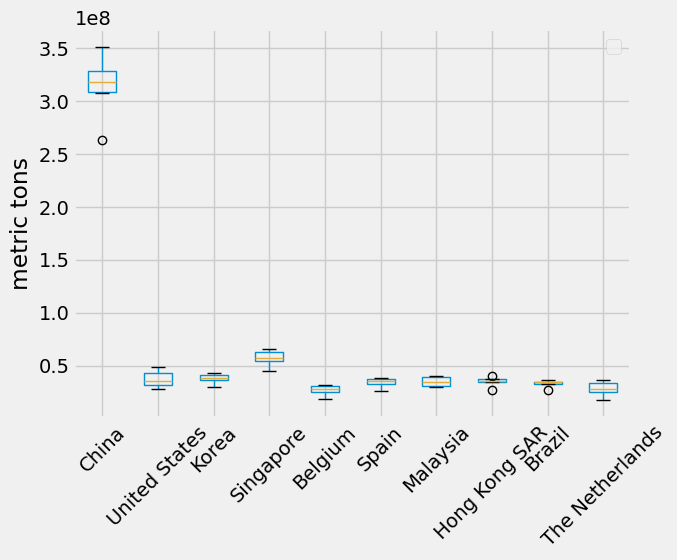

In [214]:
container_terminal_pivot_export_10.iloc[:, :].boxplot()
plt.xticks(rotation=45)
plt.ylabel('metric tons')
plt.legend()

Analiza rozkładu eksportu z wyłączeniem Chin.
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


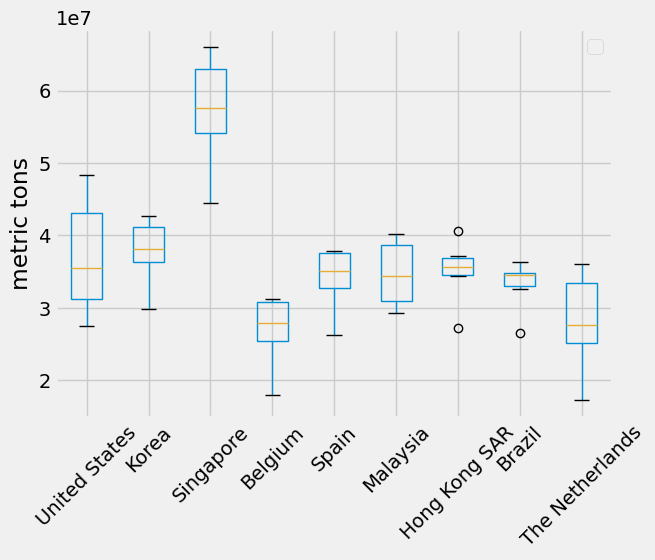

In [215]:
container_terminal_pivot_export_10.iloc[:, 1:].boxplot()
plt.xticks(rotation=45)
plt.ylabel('metric tons')
plt.legend()

Analiza statystyczna eksportu 2019-2024.
---

In [216]:
container_terminal_pivot_export_10.describe()

country,China,United States,Korea,Singapore,Belgium,Spain,Malaysia,Hong Kong SAR,Brazil,The Netherlands
count,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
mean,314929511.918,37036822.463,37795241.980,57238561.316,26901127.314,34112957.527,34711642.460,35101667.612,33230105.173,28056400.014
std,29540111.583,8311220.350,4701914.357,7922395.202,5048513.326,4471920.942,4675870.900,4413615.061,3464139.066,6981048.124
min,263621435.392,27483557.710,29875511.160,44424806.083,18030119.176,26302718.963,29325003.904,27269574.153,26584590.297,17269695.099
25%,308826415.545,31183386.957,36304664.361,54192971.343,25472721.337,32714060.570,30965204.134,34554308.753,33031547.045,25158545.351
50%,318518763.720,35534687.082,38154506.533,57590329.874,27886668.117,35157462.247,34392750.655,35601327.351,34532076.800,27627526.913
75%,328479794.187,43100188.374,41167818.227,62940155.749,30793913.448,37549372.555,38744830.460,36895823.987,34828077.601,33428654.277
max,351522338.180,48313027.183,42726621.894,66041952.525,31172240.838,37813832.368,40141137.192,40605151.400,36273772.148,36115736.262


In [219]:
container_terminal

,year,month,country,portcalls_container,portname,import_container,export_container
0,2019,1,Australia,0,Abbot Point,0.000,0.000
1,2019,1,Australia,0,Abbot Point,0.000,0.000
2,2019,1,Australia,0,Abbot Point,0.000,0.000
3,2019,1,Australia,0,Abbot Point,0.000,0.000
4,2019,1,Australia,0,Abbot Point,0.000,0.000
...,...,...,...,...,...,...,...
3486148,2024,9,Portugal,1,Leixoes,961.411,0.000
3486149,2024,9,Portugal,1,Leixoes,211.382,0.000
3486150,2024,9,Portugal,2,Leixoes,1339.750,2619.870
3486151,2024,9,Portugal,3,Leixoes,725.625,1231.783


# 9. Zestawienie wielkości importu i eksportu w latach 2019–2024 obejmie kraje, które znalazły się w czołowej dziesiątce zarówno pod względem eksportu, jak i importu: United States, China, Korea, Singapore, Spain, Malaysia, The Netherlands.
---

In [220]:
df_suma = container_terminal.groupby(['year', 'country'])[['import_container', 'export_container']].sum().reset_index()
df_suma

,year,country,import_container,export_container
0,2019,Albania,49111.228,13193.781
1,2019,Algeria,2724818.402,189005.491
2,2019,American Samoa,73633.215,32894.271
3,2019,Angola,3117344.047,212707.303
4,2019,Anguilla,0.000,119.518
...,...,...,...,...
1075,2024,Uruguay,937429.758,2065325.382
1076,2024,Vanuatu,78102.768,20597.929
1077,2024,Venezuela,1594219.201,86035.399
1078,2024,Vietnam,24363860.705,18179976.023


In [225]:
selected_countries = ['United States', 'China', 'Korea', 'Singapore', 'Spain', 'Malaysia', 'The Netherlands']

In [226]:
df_selected = df_suma[df_suma["country"].isin(selected_countries)]

Łączna wartość importu i eksportu w latach 2019-2024 dla siedmiu krajów, które znalazły się w czołowej dziesiątce zarówno pod względem eksportu, jak i importu.
---

In [228]:
df_selected.head(20)

,year,country,import_container,export_container
27,2019,China,149343407.719,329298981.177
84,2019,Korea,36356473.081,42726621.894
93,2019,Malaysia,37867072.572,39995090.512
139,2019,Singapore,55029488.551,66041952.525
145,2019,Spain,30486477.903,37813832.368
160,2019,The Netherlands,32727238.640,34603765.598
173,2019,United States,81331226.477,48313027.183
207,2020,China,150841159.280,311015294.226
264,2020,Korea,36284558.483,38241006.915
273,2020,Malaysia,32301379.525,33791451.006


In [229]:
df_selected.shape

(42, 4)

In [230]:
df_selected.to_excel('export i import 7 państw z latach19-24.xlsx', index=False)

In [231]:
df_selected.head()

,year,country,import_container,export_container
27,2019,China,149343407.719,329298981.177
84,2019,Korea,36356473.081,42726621.894
93,2019,Malaysia,37867072.572,39995090.512
139,2019,Singapore,55029488.551,66041952.525
145,2019,Spain,30486477.903,37813832.368


# 10. Zestawienie importu oraz eksportu z podziałem na kraje.
---

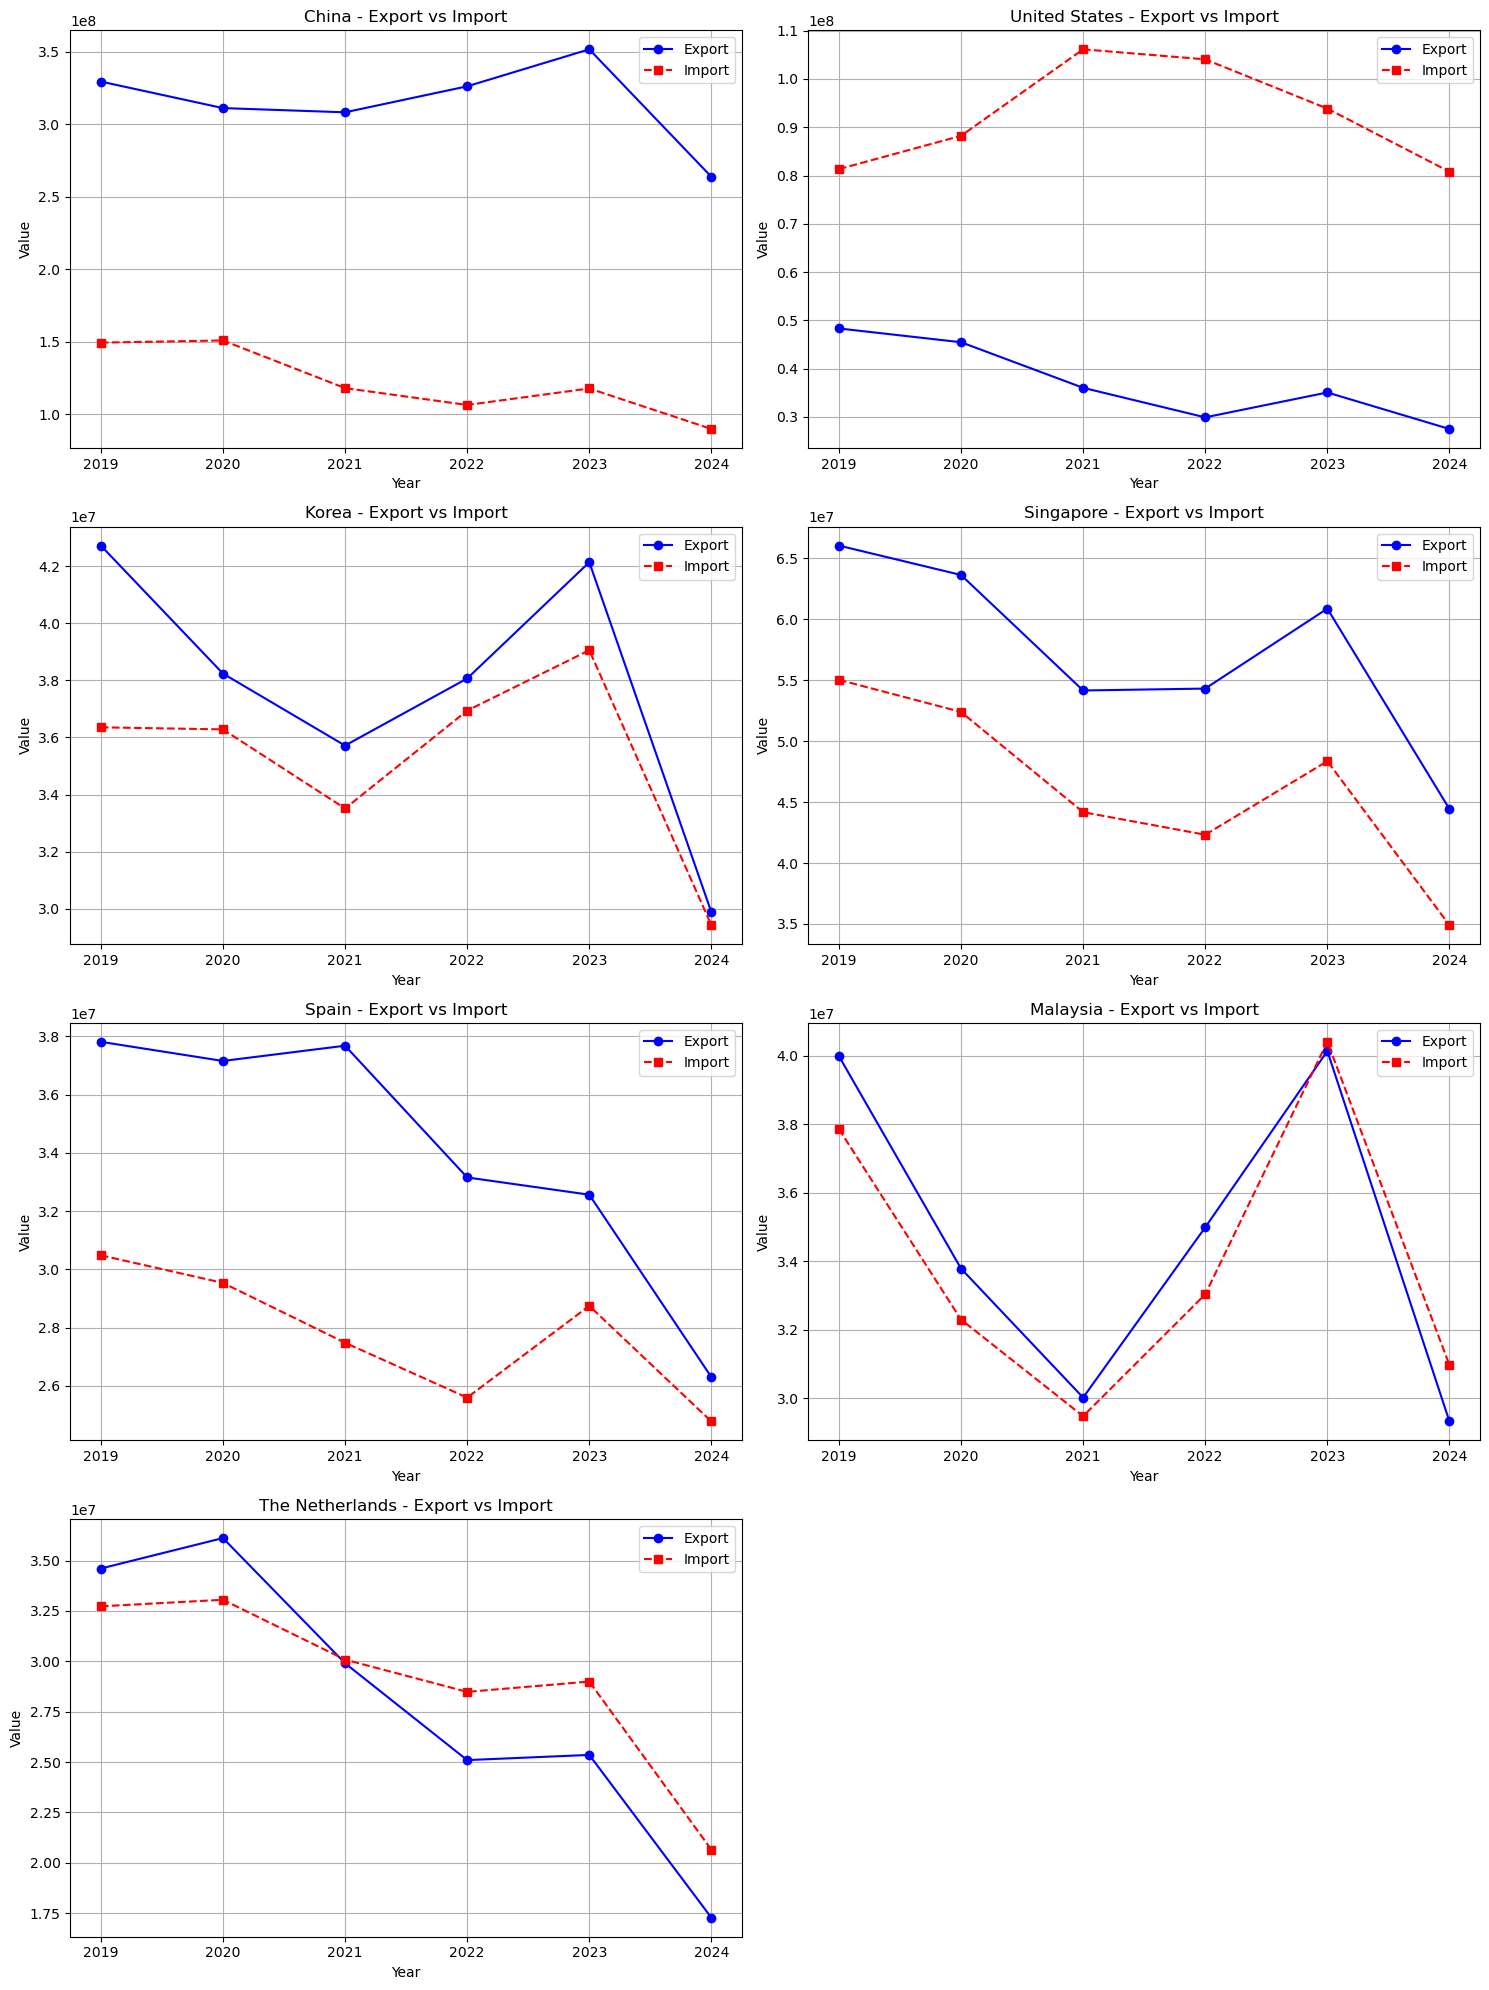

In [64]:
# Dane eksportu (pierwsza tabela)
import_data = {
    "China": [1.493434e+08, 1.508412e+08, 1.179960e+08, 1.063747e+08, 1.177470e+08, 8.981217e+07],
    "United States": [8.133123e+07, 8.822412e+07, 1.061498e+08, 1.040706e+08, 9.386673e+07, 8.079329e+07],
    "Korea": [3.635647e+07, 3.628456e+07, 3.351279e+07, 3.694239e+07, 3.905857e+07, 2.942007e+07],
    "Singapore": [5.502949e+07, 5.239489e+07, 4.417368e+07, 4.232048e+07, 4.835584e+07, 3.489655e+07],
    "Spain": [3.048648e+07, 2.953852e+07, 2.748411e+07, 2.560123e+07, 2.874978e+07, 2.478134e+07],
    "Malaysia": [3.786707e+07, 3.230138e+07, 2.947996e+07, 3.303762e+07, 4.041054e+07, 3.097124e+07],
    "The Netherlands": [3.272724e+07, 3.305280e+07, 3.008249e+07, 2.848124e+07, 2.899303e+07, 2.064532e+07],
}

# Dane importu (druga tabela)
export_data = {
    "China": [3.292990e+08, 3.110153e+08, 3.080968e+08, 3.260222e+08, 3.515223e+08, 2.636214e+08],
    "United States": [4.831303e+07, 4.546091e+07, 3.601803e+07, 2.989407e+07, 3.505135e+07, 2.748356e+07],
    "Korea": [4.272662e+07, 3.824101e+07, 3.571688e+07, 3.806801e+07, 4.214342e+07, 2.987551e+07],
    "Singapore": [6.604195e+07, 6.363018e+07, 5.415377e+07, 5.431059e+07, 6.087007e+07, 4.442481e+07],
    "Spain": [3.781383e+07, 3.715658e+07, 3.768030e+07, 3.315834e+07, 3.256597e+07, 2.630272e+07],
    "Malaysia": [3.999509e+07, 3.379145e+07, 3.002312e+07, 3.499405e+07, 4.014114e+07, 2.932500e+07],
    "The Netherlands": [3.460377e+07, 3.611574e+07, 2.990332e+07, 2.509415e+07, 2.535173e+07, 1.726970e+07],
}

# Lata
years = np.array([2019, 2020, 2021, 2022, 2023, 2024])

# Tworzenie wykresów
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, country in enumerate(export_data.keys()):
    ax = axes[i]
    ax.plot(years, export_data[country], marker='o', linestyle='-', label='Export', color='blue')
    ax.plot(years, import_data[country], marker='s', linestyle='--', label='Import', color='red')
    ax.set_title(f"{country} - Export vs Import")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid()

# Usunięcie pustej osi (bo mamy 7 wykresów, a układ jest 4x2)
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [237]:
ports_in_China = container_terminal[(container_terminal.country=="China")]

 Chiny dominuja pod względem eksportu jak i importu. Głębszej analizie poddane zostaną ilosci portow kontenerowych.
---

In [238]:
ports_in_China

,year,month,country,portcalls_container,portname,import_container,export_container
168000,2019,1,China,21,Qingdao,62078.376,62320.803
168001,2019,8,China,19,Qingdao,35194.173,145266.167
168002,2019,1,China,21,Qingdao,36750.211,53734.781
168003,2019,8,China,12,Qingdao,16400.736,77382.660
168004,2019,1,China,18,Qingdao,47806.871,59898.272
...,...,...,...,...,...,...,...
3262979,2024,10,China,0,Penglai,0.000,0.000
3262983,2024,10,China,0,Penglai,0.000,0.000
3262986,2024,10,China,0,Penglai,0.000,0.000
3262991,2024,10,China,0,Penglai,0.000,0.000


In [239]:
container_terminals_in_China=ports_in_China[ports_in_China['portcalls_container']>0]['portname'].unique()

Container terminals in China.
---

In [241]:

container_terminals_in_China

array(['Qingdao', 'Dongjiakou', 'Qinzhou', 'Qinhuangdao', 'Qiwei',
       'Quanzhou', 'Rizhao', 'Sanshandaocun', 'Shantou', 'Shanghai',
       'Shekou (Shenzhen)', 'Shidao Newport', 'Shougang Jingtang',
       'Basuo', 'Taicang', 'Tangshan (Jingtang)', 'Tianjin Xin Gang',
       'Bayuquan', 'Beihai', 'Weifang Port', 'Weihai', 'Wenzhou',
       'Xiagong', 'Xiamen', 'Xiuyu', 'Yangpu', 'Yantai', 'Yantian',
       'Yingkou', 'Zhangjiangang', 'Zhanjiang', 'Zhapu', 'Zhouliwang',
       'Zhoushan', 'Bohai Bay', 'Dongguan', 'Nanjing', 'Yangshan',
       'Mawan', 'Dachan Bay', 'Pulandian', 'Qushan Island', 'Zhuhai',
       'Gulei', 'Guangao', 'Luanjiakou', 'Dafeng', 'Lushun', 'Luoyuan',
       'Changshu', 'Changzhou', 'Dalian', 'Dandong', 'Fang-Cheng',
       'Fuzhou', 'Gaogang', 'Gourd Shanzui', 'Guangdong Yangjiang Port',
       'Guangzhou', 'Guangxi Beibu Gulf Port', 'Haikou', 'Haimen',
       'Harbor Yeweiju', 'Huizhou', 'Jiangyin', 'Jinzhou Wan',
       'Lanqiao Port', 'Lianyungang', 'Long

# 11. Liczba terminali kontenerowych w analizowanym zbiorze danych.

In [242]:
container_terminal_in_the_worlde = container_terminal[container_terminal["portcalls_container"] > 0]
terminals_in_the_world_by_countries = container_terminal_in_the_worlde.groupby("country")["portname"].nunique().reset_index()
terminals_in_the_world_by_countries.columns = ["country", "unique_ports"]
terminals_in_the_world_by_countries_sort = terminals_in_the_world_by_countries.sort_values(by="unique_ports", ascending=False)
terminals_in_the_world_by_countries_sort_10 = terminals_in_the_world_by_countries_sort.head(10)
terminals_in_the_world_by_countries_sort_10

,country,unique_ports
79,Japan,85
169,United States,76
27,China,73
168,United Kingdom,60
72,Indonesia,58
115,Norway,45
77,Italy,37
143,Spain,37
165,Türkiye,31
129,Russian Federation,31


Zestawienie 10 pierwszych pozycji na liscie pod względem ilosci terminali przeładunkowych.


In [70]:
#Terminale_na_Świecie_po_krajach_posortowany_10=Terminale_na_Świecie_po_krajach_posortowany_10.set_index('country')
#Terminale_na_Świecie_po_krajach_posortowany_10

Jak widać z analizowanych danych ilość portów przeładunkowych Chin jest zblizona do wielkości w Japoni i w Stanach Zjednoczonych. Wynika zatem iż nie ilość portów jest tu wyznacznikiem przeładowanych ilosci. Ciekawa byłaby analiza mozliwości przeładunkowych terminali kontenerowych. Do rozpatrzenia zagadnienia  potrzebne sa  dodatkowe informacje takie jak: długość nabrzeża na terminalu kontenerowym, ilośc dostepnych suwnic nabrzezowych, przyblizona produktywnośc.  Wspomniane dane dałyby nowe światło na analizowane kraje.
---

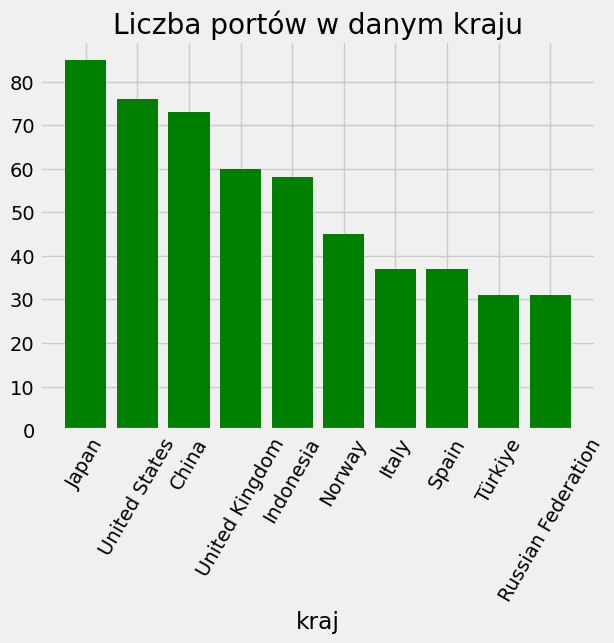

In [245]:
plt.style.use('fivethirtyeight')

plt.bar(Terminale_na_Świecie_po_krajach_posortowany_10['country'], Terminale_na_Świecie_po_krajach_posortowany_10['unique_ports'], color='green')
plt.xlabel('kraj')

plt.xticks(rotation=60)
plt.title('Liczba portów w danym kraju')
plt.show()

#dominują Chiny -nie ma tu zaskoczenia

In [246]:
data_by_country = container_terminal.groupby('country')[['portcalls_container']].sum().sort_values(by='portcalls_container', ascending=False)

In [247]:
data_by_country_top_10 = data_by_country.head(10)# tu widzimy natężenie nie wiemy czy statek stał jeden dzień czy to było kilka dni ten sam.

# 12. Analiza liczby statków obsłużonych w latach 2019–2024 (jednostki)
---

In [248]:
data_by_country_top_10

,portcalls_container
country,
China,411149
Japan,188309
United States,117632
Korea,105140
Vietnam,92086
Singapore,87283
Indonesia,85933
Spain,84205
Malaysia,81610


Powyzsze zestwienie jest potwierdzeniem  pozycji Chin jako lidera w przeładunkach kontenerowych. Porównując ilośc dostępnych portów kontenerowych w Chinach do ilości obsłuzonych statkow można wnioskowac o dużych zdolnościach przeładunkowych. Sytuacja ta może wynikać z zaawansowanej infrastruktury a co za tym idzie wysokiej wydajnosci przeładunkowej.
---

In [75]:
Dane_by_country_kontenerowce_all_top10.sum()

portcalls_container    1334681
dtype: int64

Ilośc obsłużonych statków kontenerowych w latach 2019-2024.
---

Chiny to duży kraj, położony strategicznie na wybrzeżu Azji Wschodniej. Posiadają długą linię brzegową i bogaty system rzeczny, dzięki czemu rozwinęły sieć portów morskich, odgrywając istotną rolę w imporcie i eksporcie tego kraju. Obecnie Chiny posiadają wiele dużych i nowoczesnych portów morskich.
---

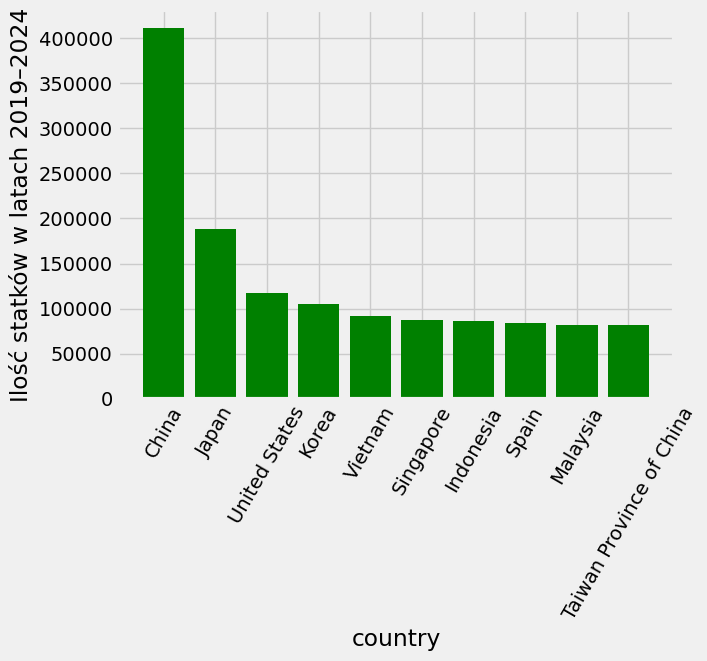

In [76]:
plt.style.use('fivethirtyeight')

plt.bar(Dane_by_country_kontenerowce_all_top10.index, Dane_by_country_kontenerowce_all_top10['portcalls_container'], color='green')
plt.xlabel('country')
plt.ylabel('Ilość statków w latach 2019–2024')
plt.xticks(rotation=60)
plt.title('')
plt.show()

#dominują Chiny -nie ma tu zaskoczenia

 Chiny dominuja jesli chodzi o eksport i import kontenerów co dowodzi jakie znaczenie globalne ma ten kraj. Bilans eksportu i importu może się inaczej kształtować przy uwzględnieniu przeładunków w TEU. TEU (Twenty-Foot Equivalent Unit) to jednostka miary wykorzystywana w transporcie kontenerowym, która odnosi się do standardowego kontenera o długości 20 stóp (około 6,1 metra). TEU służy do wyrażania liczby kontenerów w transporcie morskim, niezależnie od tego, czy są one pełne, czy puste. Patrząc na powyższe zestawienie można zadać pytanie jaka część kontenerów wraca do portu pusta. Zestawienie przeładowanych ilości w TEU  moze posłużyc do dalszej analizy.
 ---